# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [48]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [49]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [50]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [51]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [52]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp17 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['COVID-19'] # define the keywords, tweets contain election

locations = [32.31032842,-90.19378743,] #defin the location, in Jackson, Mississippi

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [12]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1336016507940327425
1336016508187766785
1336016508091154432
1336016508699422723
1336016508754030598
1336016508879835136
1336016508946812929
1336016510045859840
1336016510805020675
1336016510192672768
1336016511752876034
1336016511731961863
1336016513036324866
1336016514294530051
1336016514487611393
1336016514583969793
1336016515116773381
1336016515062263810
1336016515213234181
1336016517046079488
1336016517662527488
1336016517985677314
1336016518543511555
1336016518631591936
1336016518832926731
1336016519160094729
1336016519495553025
1336016519533367296
1336016519860531200
1336016520275607552
1336016521613684736
1336016521538097159
1336016521794121728
1336016521903165448
1336016521727004683
1336016522116927489
1336016522377113602
1336016522586828802
1336016522863665154
1336016524478439428
1336016525514268672
1336016525388607488
1336016526659489801
1336016527720636418
1336016528051990528
1336016528660176897
1336016528567779328
1336016529113145350
1336016529343696896
1336016530870513664


1336016700450410497
1336016701020893191
1336016702413414402
1336016702232997896
1336016702685974530
1336016703017324547
1336016703218733056
1336016703373914114
1336016703415783427
1336016704103706629
1336016704774803456
1336016705101975556
1336016705747734528
1336016705668087809
1336016705571540993
1336016705999527936
1336016706263789573
1336016706859315200
1336016707572396032
1336016708398616579
1336016709111541760
1336016708998492162
1336016709745061889
1336016710055432193
1336016710101573635
1336016710328066058
1336016710797848577
1336016711749939203
1336016713079468041
1336016713402486784
1336016713259778053
1336016713708552192
1336016713817722880
1336016713788231680
1336016714300059652
1336016715621298176
1336016715738533888
1336016716485324802
1336016716942327809
1336016717202468868
1336016717739397123
1336016718695714816
1336016718792155136
1336016719152726016
1336016720251785216
1336016720570421249
1336016720637681665
1336016721786892289
1336016722927685632
1336016723242332160


1336016886400749571
1336016886765514754
1336016887059197952
1336016887046688769
1336016887482900480
1336016887881363464
1336016888854298624
1336016889580052487
1336016890355798016
1336016890712391680
1336016891010297859
1336016892960628740
1336016893212307456
1336016893828861953
1336016893858127873
1336016894499893252
1336016894562869248
1336016894734819333
1336016895921844225
1336016896056053760
1336016895917625344
1336016896324354048
1336016896332881921
1336016896848752642
1336016897419173893
1336016897775521792
1336016897737957386
1336016898937524228
1336016899403034625
1336016900753674242
1336016899705073670
1336016900896169984
1336016901445570561
1336016901546369032
1336016901454110727
1336016901642850304
1336016901756088322
1336016901814808577
1336016902137630720
1336016902368481280
1336016902422933506
1336016902888382465
1336016903874244614
1336016904230617088
1336016905228849152
1336016905455296513
1336016906520825859
1336016906801713153
1336016907082731520
1336016907082850306


1336017077115621376
1336017077484859392
1336017078726299648
1336017079284142080
1336017079657443328
1336017079749791746
1336017081318449155
1336017081750478848
1336017082069073920
1336017082308300800
1336017084032057345
1336017083923116034
1336017084283822085
1336017084548083713
1336017085223358467
1336017087358267392
1336017087467143169
1336017088306180108
1336017088725483521
1336017089400860675
1336017089480548356
1336017089665110019
1336017089723650053
1336017090139058177
1336017090260717568
1336017090449453057
1336017090390712321
1336017090956972035
1336017090843701250
1336017090902454276
1336017091061805058
1336017091506409474
1336017091900682241
1336017091992973312
1336017092789854213
1336017093486145536
1336017093515423744
1336017092655554560
1336017094496882688
1336017095298052096
1336017095247589377
1336017095541264386
1336017095688073219
1336017097940299777
1336017098082897920
1336017098183684100
1336017098812829703
1336017098674479115
1336017098997452800
1336017099630768130


1336017266153050120
1336017266563936257
1336017266908012548
1336017267012870144
1336017267197349897
1336017267923021824
1336017268510101505
1336017268723970048
1336017269114146816
1336017269210689540
1336017269327982596
1336017269567188992
1336017269604933636
1336017269722378247
1336017269927813120
1336017269755940864
1336017271035084800
1336017270896779265
1336017271513341952
1336017271873998849
1336017271832055810
1336017272553566210
1336017273094615051
1336017273153351683
1336017274449248256
1336017274377945089
1336017274201923586
1336017274621153280
1336017274977837059
1336017274944311297
1336017274952511488
1336017277641220096
1336017277876133892
1336017277691555841
1336017278735962112
1336017279629238273
1336017279646101506
1336017279348314119
1336017279981674497
1336017280052965376
1336017280250093570
1336017281156059146
1336017281583747073
1336017281432817667
1336017282192044035
1336017282057842696
1336017282242318336
1336017282896683011
1336017282338840576
1336017283018264576


1336017436030586880
1336017436420747264
1336017436529872896
1336017436848443394
1336017437901336579
1336017438064914432
1336017438752854017
1336017438996107268
1336017439105056768
1336017439247753217
1336017439499366401
1336017440258592769
1336017440891875329
1336017441357443072
1336017441483345921
1336017441751764996
1336017442728890368
1336017443592970240
1336017443672764417
1336017445828644869
1336017446336159744
1336017446399074304
1336017447254683652
1336017447586066432
1336017447489572865
1336017448018063360
1336017448449896453
1336017448575795201
1336017449658028032
1336017450371002368
1336017451126038529
1336017451054592000
1336017451813920769
1336017452166230017
1336017452044574727
1336017452245929984
1336017453231591424
1336017453818777602
1336017454057844738
1336017454078722049
1336017454108205057
1336017455366324224
1336017455966113792
1336017455945224194
1336017456280768515
1336017456481984513
1336017457690144770
1336017458570821634
1336017458357018628
1336017459904716804


1336017633523736579
1336017633699790851
1336017633779609600
1336017634073067520
1336017633989234689
1336017634027053057
1336017634106744836
1336017634396135426
1336017634299584512
1336017635595743238
1336017637550133248
1336017637134962688
1336017639383117835
1336017640125415425
1336017640624680963
1336017640586883073
1336017641408921601
1336017641517903875
1336017641522167808
1336017641958412290
1336017642281336832
1336017642906378241
1336017642973433858
1336017643015446532
1336017643195822080
1336017643237732358
1336017643384549376
1336017643577421825
1336017644361756674
1336017644785442817
1336017644462497797
1336017645708009472
1336017645649485832
1336017647020883968
1336017647654346752
1336017647641747457
1336017648904265729
1336017649956950016
1336017650254831626
1336017650405822465
1336017650447568897
1336017650661675011
1336017651026423808
1336017651106078720
1336017651295014919
1336017651479408641
1336017652008022018
1336017652280647681
1336017653283123200
1336017653450858497


1336017806538772481
1336017807465721858
1336017809692708865
1336017809764184069
1336017810745479169
1336017811550957568
1336017812259819523
1336017812385652738
1336017812389761030
1336017814017204225
1336017814017040384
1336017813526335488
1336017815313104897
1336017815686492160
1336017816131170306
1336017816521207811
1336017816877723651
1336017817452212224
1336017817536180227
1336017817791987714
1336017818287042566
1336017818551164928
1336017818769297409
1336017818907799552
1336017819700432897
1336017820690182145
1336017821323681792
1336017821353046016
1336017821873152002
1336017822892351489
1336017823760519168
1336017823877853185
1336017823923982336
1336017824209309699
1336017824129699847
1336017824104538122
1336017825383677953
1336017825438322688
1336017825501229059
1336017825589301248
1336017825538957317
1336017825752866820
1336017825698287616
1336017827346702336
1336017827388563456
1336017829016064008
1336017832111464448
1336017832186822656
1336017832136626177
1336017832589582337


1336017985010610179
1336017984947712006
1336017985148919809
1336017985417392129
1336017985778102280
1336017985857843200
1336017986646241282
1336017987262947330
1336017987774668810
1336017988747747329
1336017989099982852
1336017989137739778
1336017989544513536
1336017990005952512
1336017990182170627
1336017991914295298
1336017992182870019
1336017993306877954
1336017994653331463
1336017993290149891
1336017996943388672
1336017997161508868
1336017997287346183
1336017997887107072
1336017997857779713
1336017998314921984
1336017999396999172
1336017999845875712
1336018000269467650
1336018001229963264
1336018001468993542
1336018002735550464
1336018002790084609
1336018003071209480
1336018003310354432
1336018004040146951
1336018004920897541
1336018005046726657
1336018006112137217
1336018006376411143
1336018006502039552
1336018006594478080
1336018006758076419
1336018006841946114
1336018007378722817
1336018007840133126
1336018008037322753
1336018008213426177
1336018008230256641
1336018008997695494


1336018167538311170
1336018167731281927
1336018168360411139
1336018169929064449
1336018170465935362
1336018170843443200
1336018172214996997
1336018172437295104
1336018172873469956
1336018173653643266
1336018174542815232
1336018174601551878
1336018174773497862
1336018175138344960
1336018175578824707
1336018175704453122
1336018177629835264
1336018178082795525
1336018179026419713
1336018179508690948
1336018179622117382
1336018179773124608
1336018180234489857
1336018180079308803
1336018180620238850
1336018181387939845
1336018181924802564
1336018182377758720
1336018182809792513
1336018183397003271
1336018183967428617
1336018185653370880
1336018185821114373
1336018185636679686
1336018186903449605
1336018187142434817
1336018187293319169
1336018187335454721
1336018187675111425
1336018187708747776
1336018187859668993
1336018188019130371
1336018188941856776
1336018188857798656
1336018190686711808
1336018190703398912
1336018190799785984
1336018190938279941
1336018192313958400
1336018193073266695


1336018356034473985
1336018356848168960
1336018357099917312
1336018357573865473
1336018357670309889
1336018358026854401
1336018359972978691
1336018359985582081
1336018361289990145
1336018362560892930
1336018362548293634
1336018362887856128
1336018363198234624
1336018363563307008
1336018363756122112
1336018364397989892
1336018364351664128
1336018365324914694
1336018365878591488
1336018365731774464
1336018365933031425
1336018366163804165
1336018366381821953
1336018366230884353
1336018366516125703
1336018368407564289
1336018368969781249
1336018369397411841
1336018369452015616
1336018369523412993
1336018370358022147
1336018370731323393
1336018371024973825
1336018371108888591
1336018371830312965
1336018372614615040
1336018372585197571
1336018372291661827
1336018372723679235
1336018372975276033
1336018372904038401
1336018374317514754
1336018374606852096
1336018374980218894
1336018375575736321
1336018376443965440
1336018377278705669
1336018376385327105
1336018377454669825
1336018377685544960


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
geocode = "32.31032842,-90.19378743, 100 mi"  # defin the location, in Jackson, MI
q = "COVID-19"                               #define the keywords, tweets contain COVID-19

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

IndexError: list index out of range

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

NameError: name 'since_id_new' is not defined

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

6362
5872


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [30]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID-19"}}) # return tweets contain covid-19

Use pprint to display tweets

In [31]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Jessica Trufant Powers
text: COVID-19 press conferences hit different when you have COVID-19 🥴
----
name: TopNotch Programmer
text: RT @JSTrufant: COVID-19 press conferences hit different when you have COVID-19 🥴
----
name: NOOB-SAIBOT 🏴‍☠️
text: @PESMasterRace Le Covid-19 est un virus en raison du Covid-19 🤔
----
name: Coronavirus update
text: RT @geoffreyyork: Sweden’s Covid-19 experiment is over. After a surge in Covid-19 infections led to rising hospitalizations and deaths, Swe…
----
name: Pauline Donovan
text: RT @ElonBachman: 2\ In North Dakota, 36% of COVID-19 hospitalizations are there for other reasons

39% of COVID-19 ICU patients are there f…
----
name: Dünyamız
text: RT @ZeydanKaralar01: Covid-19 pozitif hasta nakil aracı hizmetinizde

Covid-19 hastalarımızın evden hastaneye, hastaneden eve ulaşımlarını…
----
name: ibabnya lagi uas hehe
text: RT @GUGUDANGLOBAL_: [COVID-19 TEST NOTICE]

gugudan’s mina has taken a test for Covid-19 after celebrating her birthday wi

In [27]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID-19"}}) # return tweets contain covid-19

Use pandas to display tweets

In [28]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,retweeted_status,display_text_range,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities
0,5fce765676eea84f5401887f,Mon Dec 07 18:37:05 +0000 2020,1336016899403034625,1336016899403034625,COVID-19 press conferences hit different when ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366225468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fce765776eea84f5401888a,Mon Dec 07 18:37:06 +0000 2020,1336016902368481280,1336016902368481280,RT @JSTrufant: COVID-19 press conferences hit ...,"<a href=""https://go-shopal.herokuapp.com"" rel=...",False,NaN,None,NaN,...,1607366226175,{'created_at': 'Mon Dec 07 18:37:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fce776576eea84f5401927c,Mon Dec 07 18:41:35 +0000 2020,1336018033664520199,1336018033664520199,@PESMasterRace Le Covid-19 est un virus en rai...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.336018e+18,1336017817968242692,1.031083e+18,...,1607366495897,NaN,"[15, 63]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fce777d76eea84f5401934d,Mon Dec 07 18:42:00 +0000 2020,1336018135930068995,1336018135930068995,RT @geoffreyyork: Sweden’s Covid-19 experiment...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366520279,{'created_at': 'Sun Dec 06 20:18:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fce762476eea84f540186af,Mon Dec 07 18:36:14 +0000 2020,1336016687301341189,1336016687301341189,"RT @ElonBachman: 2\ In North Dakota, 36% of CO...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366174899,{'created_at': 'Mon Dec 07 06:06:45 +0000 2020...,NaN,1.325122e+18,1325121825144270848,{'created_at': 'Sat Nov 07 17:03:57 +0000 2020...,"{'url': 'https://t.co/96LZpVFEnV', 'expanded':...",NaN,NaN,NaN
5,5fce77d976eea84f5401967f,Mon Dec 07 18:43:32 +0000 2020,1336018523173302273,1336018523173302273,RT @ZeydanKaralar01: Covid-19 pozitif hasta na...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366612605,{'created_at': 'Mon Dec 07 11:39:41 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fce77b176eea84f54019535,Mon Dec 07 18:42:52 +0000 2020,1336018353484271616,1336018353484271616,RT @GUGUDANGLOBAL_: [COVID-19 TEST NOTICE]\n\n...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1607366572148,{'created_at': 'Mon Dec 07 08:30:32 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fce779976eea84f5401944c,Mon Dec 07 18:42:28 +0000 2020,1336018252590424065,1336018252590424065,"RT @kylegriffin1: ""Vice President-elect Kamala...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366548093,{'created_at': 'Mon Dec 07 17:50:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fce778076eea84f54019371,Mon Dec 07 18:42:03 +0000 2020,1336018149012025351,1336018149012025351,RT @ZeydanKaralar01: Covid-19 pozitif hasta na...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366523398,{'created_at': 'Mon Dec 07 11:39:41 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fce776276eea84f54019257,Mon Dec 07 18:41:32 +0000 2020,1336018021123502087,1336018021123502087,"RT @kylegriffin1: ""Vice President-elect Kamala...","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1607366492907,{'created_at': 'Mon Dec 07 17:50:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


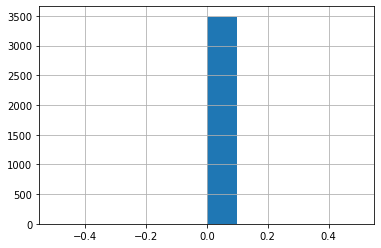

In [29]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count